# visualize or_panoptic dataset

/home/ruizhu/miniconda3/envs/py310matsegnerf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 5376/5376 [00:00<00:00, 64793.46it/s]


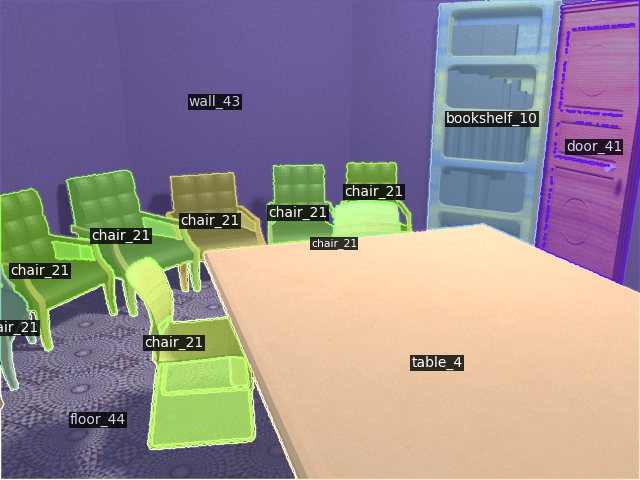

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# print(sys.path)

# from mask2former.data.datasets.register_or_panoptic import register_all_or_panoptic
# _root = os.getenv("DETECTRON2_DATASETS", "../datasets")
# register_all_or_panoptic(_root)

from detectron2.data import MetadataCatalog, DatasetCatalog
from panopticapi import utils as panopticapi_utils
or_panoptic_metadata = MetadataCatalog.get("or_panoptic_val")

from mask2former.data.datasets.register_or_panoptic import load_or_panoptic_json, get_metadata
metadata = get_metadata()
panoptic_json = '/data/OpenRooms_public/im_pan_seg_rgb_val.json'
assert Path(panoptic_json).exists(), panoptic_json
image_root = '/data/OpenRooms_public'
panoptic_root = '/data/OpenRooms_public/im_pan_seg_rgb'

dataset_dicts = load_or_panoptic_json(
    panoptic_json, image_root, panoptic_root, metadata
)

import random
import cv2
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow

# for d in random.sample(dataset_dicts, 1):
d = dataset_dicts[1]
img = cv2.imread(d["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=or_panoptic_metadata, scale=1)
out = visualizer.draw_dataset_dict(d)
cv2_imshow(out.get_image()[:, :, ::-1])

pan_seg_file_name = d['pan_seg_file_name']
assert Path(pan_seg_file_name).exists()


In [3]:
d

{'file_name': '/data/OpenRooms_public/mainDiffMat_xml/scene0403_01/im_sdr/im_12.png',
 'image_id': 1,
 'pan_seg_file_name': '/data/OpenRooms_public/im_pan_seg_rgb/main_xml/scene0403_01/im_pan_seg_rgb_12.png',
 'segments_info': [{'id': 0,
   'category_id': 42,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': True,
   'area': 85693.0},
  {'id': 1,
   'category_id': 43,
   'iscrowd': 0,
   'isthing': False,
   'isstuff': True,
   'area': 40277.0},
  {'id': 2,
   'category_id': 3,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': False,
   'area': 92316.0},
  {'id': 3,
   'category_id': 20,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': False,
   'area': 2146.0},
  {'id': 4,
   'category_id': 20,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': False,
   'area': 6001.0},
  {'id': 5,
   'category_id': 20,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': False,
   'area': 1938.0},
  {'id': 6,
   'category_id': 20,
   'iscrowd': 0,
   'isthing': True,
   'isstuff': False,
   'area'

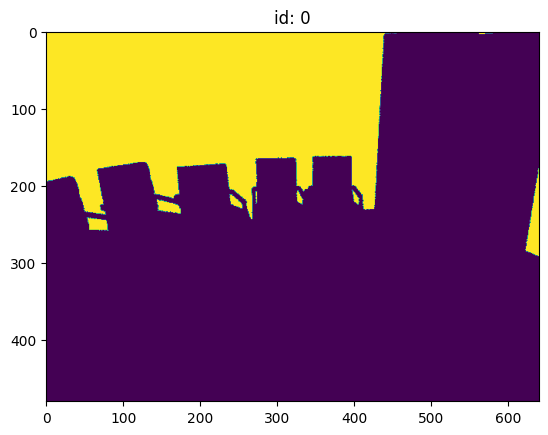

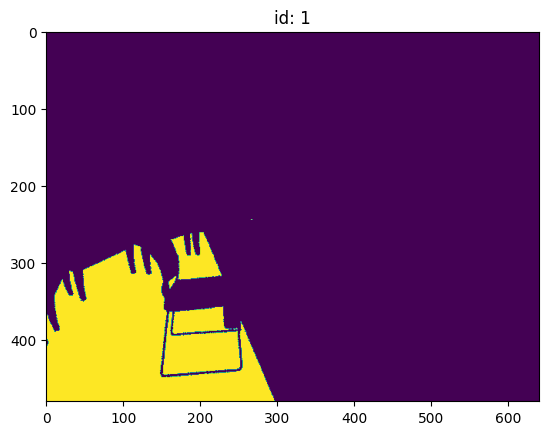

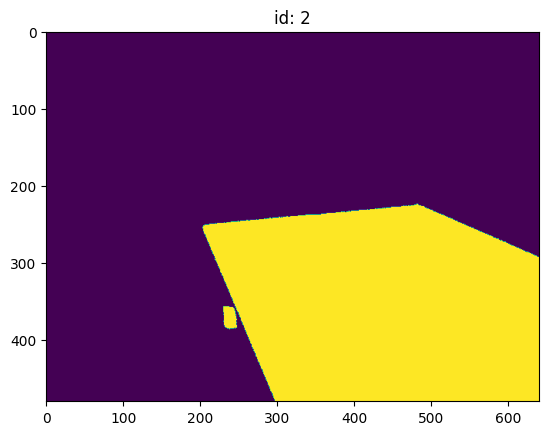

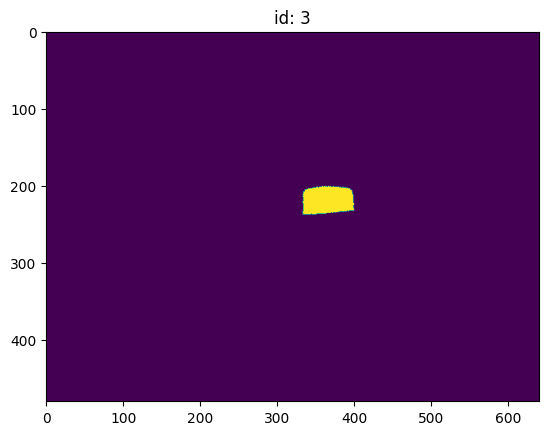

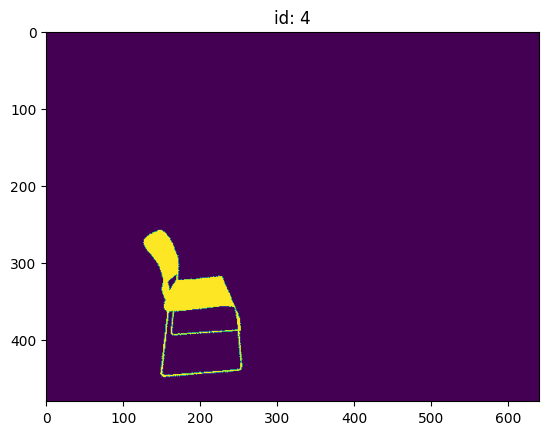

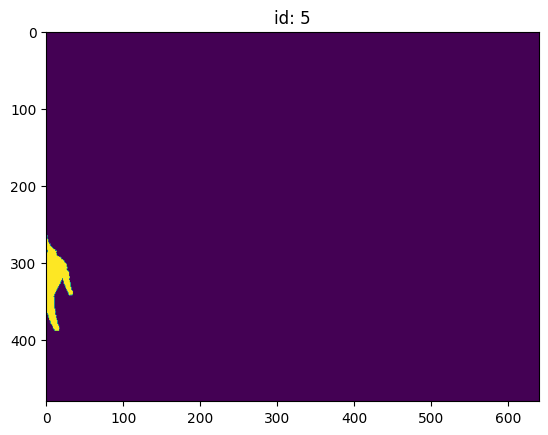

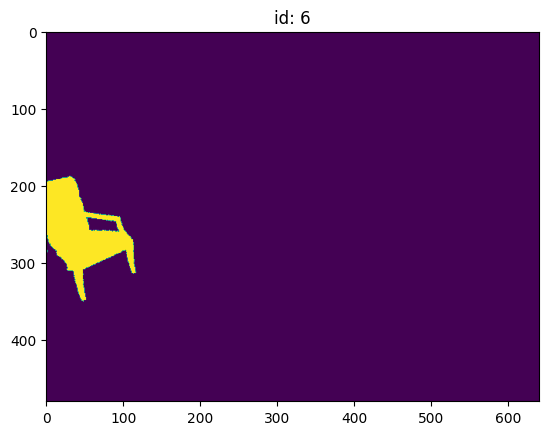

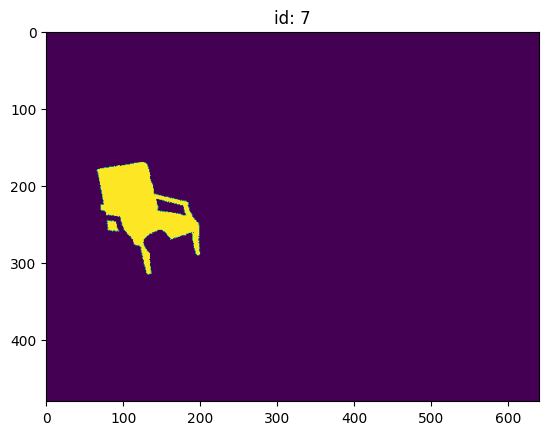

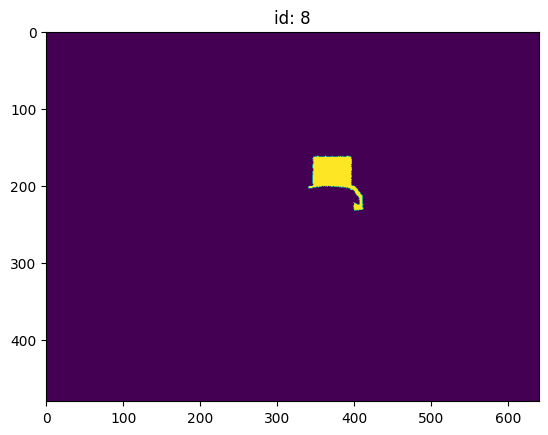

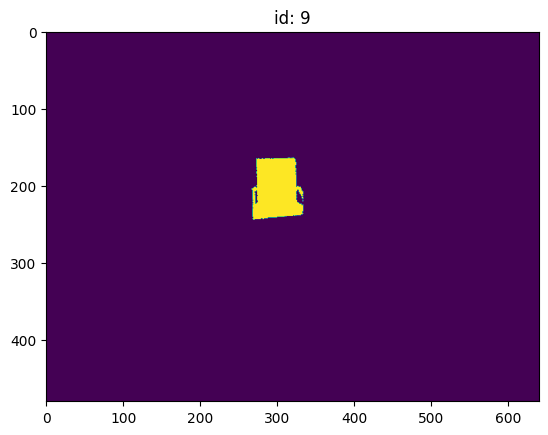

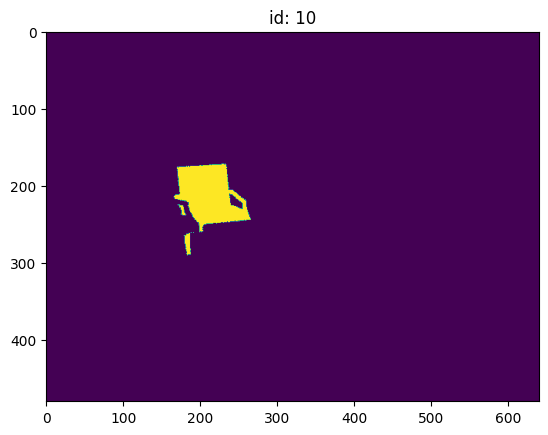

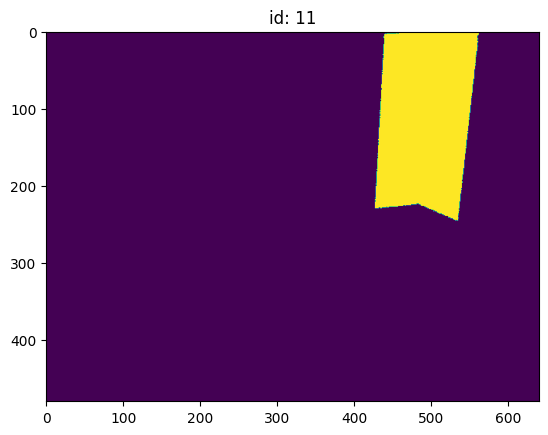

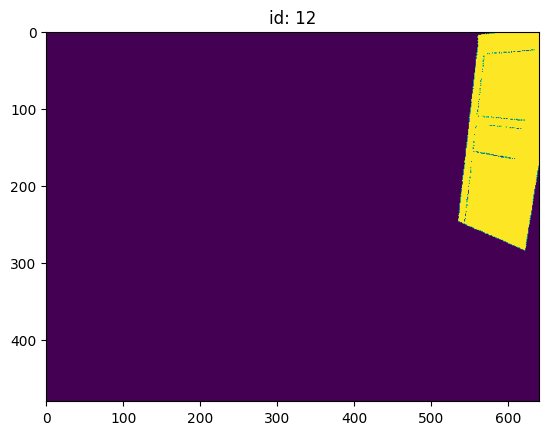

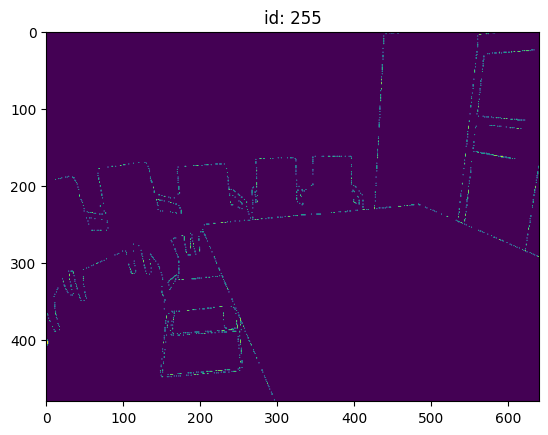

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
im_pan_seg_rgb = cv2.imread(d.get('pan_seg_file_name'))[:, :, ::-1].astype(np.int16)
im_pan_seg_ids = panopticapi_utils.rgb2id(im_pan_seg_rgb)

for _ in np.unique(im_pan_seg_ids):
    plt.figure()
    plt.imshow(im_pan_seg_ids == _)
    plt.title('id: {}'.format(_))
    plt.show()


In [4]:
# check uniqueness of stuff ids in each image; otherwise need to merge e.g. two sky stuff segs into one
from tqdm import tqdm
for d in tqdm(dataset_dicts):
    segments_info = d['segments_info']
    stuff_seg_list = []
    # print(len(segments_info), segments_info[0].keys())
    for seg in segments_info:
        if seg['isthing'] == 0:
            stuff_seg_list.append((seg['id'], seg['category_id']))
    all_stuff_ids = [_[1] for _ in stuff_seg_list]
    print(set(all_stuff_ids))
    assert len(list(set(all_stuff_ids))) <= 3, ''
    assert len(list(set(all_stuff_ids))) == len(all_stuff_ids), 'stuff ids are not unique'

100%|██████████| 5376/5376 [00:00<00:00, 282308.92it/s]

{43}
{43}
{43}
{43}
{43}
{43}
{43}
set()
{43}
{43}
{43}
set()
{43}
{43}
{44}
{43}
{43}
{43}
{43}
{43}
{43}
set()
{43}
{43, 44}
{44}
{43, 44}
{43}
{43}
{43}
set()
{43}
{43}
{43}
{43}
{43, 44}
{44}
{43}
{43}
{43}
{43}
{43, 44}
set()
{43}
{43}
{43, 44}
{43}
{44}
{43}
set()
{43}
{43}
{43}
{43}
{43}
{43}
set()
{43}
{43}
{43}
set()
{43}
{43}
{43}
{43}
{43}
set()
{43}
{44}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{44}
set()
set()
{43}
{43}
{44}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
set()
{44}
{44}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43, 44}
set()
set()
{43}
{43}
{43}
set()
set()
{43}
{43}
{43}
{44}
{43}
{43}
{44}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
set()
{43}
{43}
{43}
{43}
{43}
{44}
{43}
{43}
{44}
set()
{43, 44}
{43}
{43}
{43}
{43, 44}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43, 44}
{43}
{44}
set()
{43}
set()
set()
set()
{43}
{43}
{43}
{43}
{43}
{44}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
{43}
set()
{43}
{